In [1]:
import easyocr
import sys
reader = easyocr.Reader(['en'])
sys.path.append('/home/jessica/reading-kiln-termostat/src')
from pathlib import Path

import cv2 
import os
import pathlib
import matplotlib.pyplot as plt 
import numpy as np
import InputReader
import PreProcesser
import CurveCreator

input_reader = InputReader.InputReader()
prep = PreProcesser.PreProcesser()

# 29-08-2023-esmalte 1158,1220 [515,595, 840,1020] - Refazer, na célula
# 21-06-2024-esmalte 1160,1209 [580,670, 870,1100] - Na célula
# 04-09-2023 1078, 1220 [750,830, 1220,1420] [755,830, 1080,1280] - OK
# 04-04-2024-esmalte 1141, 1212, [435,530, 1115,1300] - Na célula
# 16-04-2024 1160, 1212 [520,620, 920,1135] [510,590, 920,1135] 58f - reescrever a partir com novo bb
# 01-08-2024-esmalte 1157, 1212, [545,635, 770,1020] - OK
# 29-08-2024-esmalte 1156, 1210, [450,565, 780,1075] - Na célula

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [2]:
firings = ['29-08-2023-esmalte', '21-06-2024-esmalte',
           '04-09-2023-esmalte', '04-04-2024-esmalte', '16-04-2024-esmalte',
          '01-08-2024-esmalte', '29-08-2024-esmalte']

initial_temps = [1158, 1160, 1078, 1141, 1160, 1157, 1156]
final_temps = [1220, 1209, 1220, 1212, 1212, 1212, 1210]

save_path = '/home/jessica/reading-kiln-termostat/data/processed_recordings/'
for firing, initial_temp, final_temp in zip(firings, initial_temps, final_temps):
    dir_path = f'/home/jessica/reading-kiln-termostat/data/original_recordings/{firing}'
    curve_creator = CurveCreator.CurveCreator(dir_path, save_path, initial_temp, final_temp)
    curve_creator.create_curve('best-mask')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [5]:
dir_path = '/home/jessica/reading-kiln-termostat/data/original_recordings/04-04-2024-esmalte'
save_path = '/home/jessica/reading-kiln-termostat/data/processed_recordings/'

curve_creator = CurveCreator.CurveCreator(dir_path, save_path, 1141, 1212, [435,530, 1115,1300], False )
curve_creator.save_cropped_images()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [3]:
dir_path = '/home/jessica/reading-kiln-termostat/data/original_recordings/21-06-2024-esmalte'
save_path = '/home/jessica/reading-kiln-termostat/data/processed_recordings/'

curve_creator = CurveCreator.CurveCreator(dir_path, save_path, 1160,1209, [580,670, 870,1100], False )
curve_creator.create_curve()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[1160,
 1161,
 1162,
 1162,
 1163,
 1164,
 1164,
 1166,
 1163,
 1160,
 1161,
 1162,
 1163,
 1164,
 1165,
 1165,
 1166,
 1167,
 1168,
 1169,
 1170,
 1171,
 1172,
 1174,
 1175,
 1176,
 1177,
 1178,
 1179,
 1181,
 1182,
 1183,
 1184,
 1186,
 1187,
 1188,
 1189,
 1191,
 1192,
 1193,
 1194,
 1195,
 1195,
 1196,
 1197,
 1198,
 1198,
 1199,
 1200,
 1200,
 1200,
 1202,
 1202,
 1203,
 1204,
 1204,
 1205,
 1206,
 1206,
 1207,
 1207,
 1208,
 1208,
 1208,
 1209,
 1209,
 1209]

In [2]:
# dir_path = '/home/jessica/reading-kiln-termostat/data/original_recordings/04-09-2023-esmalte'
# save_path = '/home/jessica/reading-kiln-termostat/data/processed_recordings/'

# curve_creator = CurveCreator.CurveCreator(dir_path, save_path, 1078, 1220, [750,830, 1220,1420], False )
# curve_creator.create_curve()

In [6]:
dir_path = '/home/jessica/reading-kiln-termostat/data/original_recordings/29-08-2024-esmalte'
save_path = '/home/jessica/reading-kiln-termostat/data/processed_recordings/'

curve_creator = CurveCreator.CurveCreator(dir_path, save_path, 1156, 1210, [450,565, 760,1095], False )
curve_creator.create_curve()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[1156,
 1158,
 1158,
 1159,
 1159,
 1161,
 1162,
 1163,
 1164,
 1165,
 1166,
 1167,
 1167,
 1168,
 1169,
 1170,
 1171,
 1172,
 1172,
 1173,
 1174,
 1174,
 1176,
 1173,
 1173,
 1175,
 1176,
 1178,
 1179,
 1181,
 1182,
 1183,
 1184,
 1185,
 1185,
 1186,
 1187,
 1188,
 1188,
 1189,
 1190,
 1190,
 1191,
 1192,
 1193,
 1193,
 1194,
 1194,
 1195,
 1195,
 1196,
 1197,
 1197,
 1197,
 1198,
 1199,
 1199,
 1200,
 1201,
 1201,
 1202,
 1203,
 1204,
 1204,
 1205,
 1206,
 1206,
 1206,
 1207,
 1207,
 1207]

In [7]:
dir_path = '/home/jessica/reading-kiln-termostat/data/original_recordings/04-04-2024-esmalte'
save_path = '/home/jessica/reading-kiln-termostat/data/processed_recordings/'

curve_creator = CurveCreator.CurveCreator(dir_path, save_path, 1141, 1212, [435,530, 1115,1300], False )

curve_creator.create_curve()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[1141,
 1143,
 1144,
 1145,
 1146,
 1147,
 1148,
 1149,
 1150,
 1150,
 1152,
 1153,
 1154,
 1155,
 1156,
 1156,
 1158,
 1158,
 1159,
 1160,
 1161,
 1162,
 1163,
 1164,
 1165,
 1166,
 1166,
 1167,
 1168,
 1169,
 1170,
 1171,
 1172,
 1172,
 1173,
 1174,
 1174,
 1176,
 1176,
 1177,
 1178,
 1179,
 1180,
 1180,
 1181,
 1182,
 1183,
 1183,
 1184,
 1185,
 1185,
 1187,
 1187,
 1188,
 1189,
 1190,
 1191,
 1192,
 1192,
 1193,
 1194,
 1195,
 1195,
 1196,
 1197,
 1198,
 1198,
 1199,
 1200,
 1200,
 1201,
 1201,
 1202,
 1202,
 1203,
 1204,
 1204,
 1205,
 1205,
 1206,
 1206,
 1207,
 1207,
 1208,
 1208,
 1209,
 1209,
 1210,
 1210,
 1211,
 1211,
 1212,
 1212,
 1212,
 1212,
 1212,
 1212]

In [3]:
dir_path = '/home/jessica/reading-kiln-termostat/data/original_recordings/16-04-2024-esmalte'
save_path = '/home/jessica/reading-kiln-termostat/data/processed_recordings/'
# #Mudar para frame 58
curve_creator = CurveCreator.CurveCreator(dir_path, save_path, 1160, 1212, [510,590, 920,1135], False )
# curve_creator.save_cropped_images()
curve_creator.create_curve()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[1160,
 1162,
 1163,
 1164,
 1164,
 1165,
 1166,
 1166,
 1168,
 1168,
 1169,
 1170,
 1170,
 1171,
 1172,
 1173,
 1174,
 1174,
 1175,
 1176,
 1177,
 1177,
 1178,
 1179,
 1179,
 1180,
 1181,
 1182,
 1182,
 1183,
 1184,
 1184,
 1185,
 1186,
 1186,
 1186,
 1188,
 1189,
 1190,
 1190,
 1191,
 1191,
 1192,
 1193,
 1194,
 1194,
 1194,
 1196,
 1197,
 1197,
 1198,
 1199,
 1200,
 1200,
 1201,
 1201,
 1202,
 1202,
 1203,
 1204,
 1204,
 1205,
 1205,
 1206,
 1206,
 1206,
 1207,
 1208,
 1208,
 1209,
 1209,
 1210,
 1210,
 1210,
 1211,
 1211,
 1212,
 1212,
 1212,
 1212,
 1212]

In [ ]:
dir_path = '/home/jessica/reading-kiln-termostat/data/original_recordings/29-08-2023-esmalte '
save_path = '/home/jessica/reading-kiln-termostat/data/processed_recordings/'

curve_creator = CurveCreator.CurveCreator(dir_path, save_path, 1158,1220 [515,595, 840,1020] , False )
curve_creator.create_curve()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[43, 13], [193, 13], [193, 77], [43, 77]], '1869', 0.3632989823818207)]

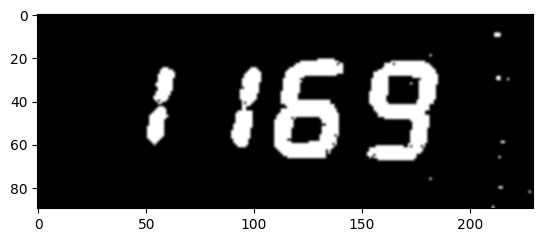

In [10]:
x_1169 = '/home/jessica/reading-kiln-termostat/data/processed_recordings/21-06-2024-esmalte/prediction_frames/2024-06-21_22:19:40_1168.png'
#Define the lower and upper bounds for the white color
# Since white is (255, 255, 255) in BGR, use a range close to it
img = cv2.imread(x_1169)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
_, threshold_image = cv2.threshold(img, 252, 255, cv2.THRESH_BINARY)

plt.imshow(threshold_image, cmap = 'gray', interpolation = 'bicubic')
ocr = reader.readtext(threshold_image, allowlist='0123456789')
ocr

In [11]:
def white_mask(image):
    lower_white = np.array([250, 250, 250], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)

    # Create a mask to filter out white pixels
    mask = cv2.inRange(image, lower_white, upper_white)

    # Optionally, apply the mask to the original image to extract only white areas
    return cv2.bitwise_and(image, image, mask=mask)

def red_mask(image):
    lower_red = np.array([110, 110, 240], dtype=np.uint8)
    upper_red = np.array([255, 255, 255], dtype=np.uint8)

    # Create a mask to filter out white pixels
    mask = cv2.inRange(image, lower_red, upper_red)

    # Optionally, apply the mask to the original image to extract only white areas
    return cv2.bitwise_and(image, image, mask=mask)

[([[62, 0], [190, 0], [190, 52], [62, 52]], '1113', 0.6099976897239685)]

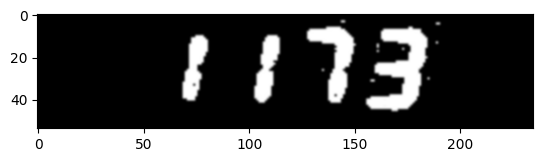

In [36]:
#Para branco
# path = '/home/jessica/reading-kiln-termostat/data/frames/crop_test/2023-09-04_18: 32:41_1192.png'
image = cv2.imread(grey1)

# Define the lower and upper bounds for the white color
# Since white is (255, 255, 255) in BGR, use a range close to it
lower_white = np.array([240, 240, 240], dtype=np.uint8)
upper_white = np.array([255, 255, 255], dtype=np.uint8)

# Create a mask to filter out white pixels
mask = cv2.inRange(image, lower_white, upper_white)

# Optionally, apply the mask to the original image to extract only white areas
white_pixels = cv2.bitwise_and(image, image, mask=mask)
ocr = reader.readtext(white_pixels, allowlist='0123456789')
plt.imshow(white_pixels, cmap = 'gray', interpolation = 'bicubic')

ocr

[([[11, 9], [119, 9], [119, 53], [11, 53]], '1085', 0.9531593322753906)]

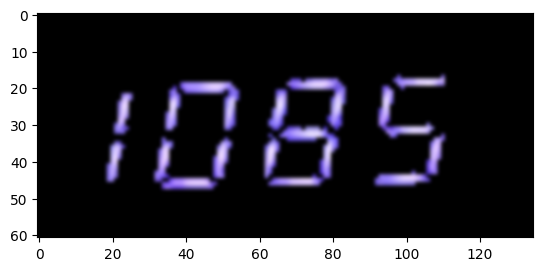

In [122]:
image = cv2.imread(red1)

# Define the lower and upper bounds for the white color
# Since white is (255, 255, 255) in BGR, use a range close to it
lower_white = np.array([50, 50, 210], dtype=np.uint8)
upper_white = np.array([255, 255, 255], dtype=np.uint8)

# Create a mask to filter out white pixels
mask = cv2.inRange(image, lower_white, upper_white)

# Optionally, apply the mask to the original image to extract only white areas
white_pixels = cv2.bitwise_and(image, image, mask=mask)
ocr = reader.readtext(white_pixels, allowlist='0123456789')
plt.imshow(white_pixels, cmap = 'gray', interpolation = 'bicubic')

ocr

[([[70, 30], [138, 30], [138, 78], [70, 78]], '17', 0.893868897832204)]

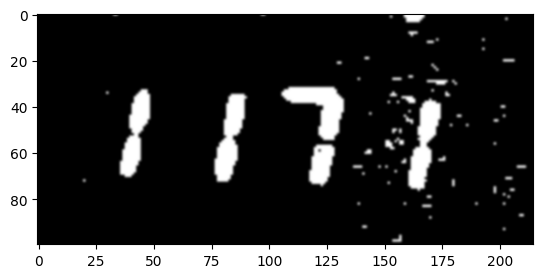

In [16]:
img = cv2.imread('/home/jessica/reading-kiln-termostat/data/processed_recordings/16-04-2024-esmalte/prediction_frames/2024-04-16_21:39:12_17_1169.png')
_, threshold_image = cv2.threshold(img, 250, 255, cv2.THRESH_BINARY)

plt.imshow(threshold_image, cmap = 'gray', interpolation = 'bicubic')

ocr = reader.readtext(threshold_image, allowlist='0123456789')
ocr

[([[9, 8], [120, 8], [120, 57], [9, 57]], '1085', 0.9951554536819458)]

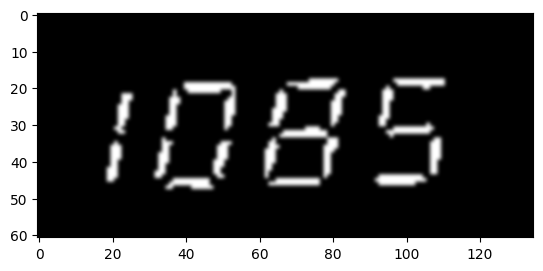

In [20]:
import numpy as np
#Define the lower and upper bounds for the white color
# Since white is (255, 255, 255) in BGR, use a range close to it
img = cv2.imread(red1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
_, threshold_image = cv2.threshold(img, 140, 255, cv2.THRESH_BINARY)

plt.imshow(threshold_image, cmap = 'gray', interpolation = 'bicubic')
ocr = reader.readtext(threshold_image, allowlist='0123456789')
ocr

'1068'

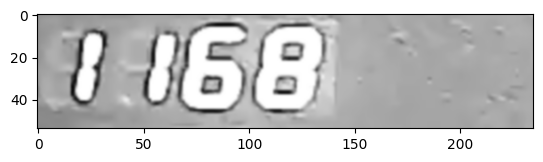

In [89]:
img = cv2.imread(test_image)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
roi = img[770:824, 1100:1335]
plt.imshow(roi, cmap = 'gray', interpolation = 'bicubic')
ocr_results = reader.readtext(roi)
ocr_results[0][1].replace(" ", "")

In [24]:
png_compression_level = 0
dir_path = '/home/jessica/reading-kiln-termostat/data/frames/04-09-2023'
p = sorted(pathlib.Path(dir_path).glob('**/*'), key=os.path.getmtime)
save_path = '/home/jessica/reading-kiln-termostat/data/frames/crop_test/'
if not os.path.exists(save_path):
    os.makedirs(save_path)
files = [str(f) for f in p if f.is_file()]
files
index = files.index('/home/jessica/reading-kiln-termostat/data/frames/04-09-2023/14_240.png')
for f in files[index:]:
    crop = cv2.imread(f)
    datetime_results = reader.readtext(f)
    texts = list(map(list, zip(*datetime_results)))[1]
    date = [text for text in texts if '-' in text][0]
    time = [text for text in texts if ':' in text][0]
    
    crop = cv2.imread(f)[770:824, 1050:1285]
    predicted_number = reader.readtext(white_mask(crop), allowlist='0123456789', paragraph = True)[0][1].replace(" ", "") 
    
    file_name = save_path + date + '_' + time + '_' + predicted_number + '.png'

    r = cv2.imwrite(file_name, crop), [int(cv2.IMWRITE_PNG_COMPRESSION), png_compression_level]

KeyboardInterrupt: 

In [53]:
p = sorted(pathlib.Path(dir_path).glob('**/*'), key=os.path.getmtime)
files = [str(f) for f in p if f.is_file()]
signal = []
for f in files:
    pattern = r"([^_]+)"
    matches = re.findall(pattern, filename)
    date = matches[0]
    time = matches[1]
    temp = int(matches[2])

In [36]:
ocr_results = reader.readtext(test_image)
for (bbox, text, prob) in ocr_results:
    print(f'Text: {text}, Probability: {prob}')

Text: 2023-09-04, Probability: 0.9985811675993548
Text: 18: 05: 41, Probability: 0.5279606141063766
Text: 068, Probability: 0.45150694481688547
Text: 836, Probability: 0.8444361164315615
Text: STEcvo, Probability: 0.4298625581323543
Text: SS, Probability: 0.9511372110453015
